In [32]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

import sys
sys.path.insert(0, '/content/drive/My Drive/ColabNotebooks')

!git clone https://github.com/UjjwalSaxena/Automold--Road-Augmentation-Library
%cd Automold--Road-Augmentation-Library

import Automold as am
import Helpers as hp

Cloning into 'Automold--Road-Augmentation-Library'...
remote: Enumerating objects: 170, done.
remote: Total 170 (delta 0), reused 0 (delta 0), pack-reused 170
Receiving objects: 100% (170/170), 59.14 MiB | 31.22 MiB/s, done.
Resolving deltas: 100% (58/58), done.
/content/Automold--Road-Augmentation-Library/Automold--Road-Augmentation-Library


In [33]:
train='/content/drive/MyDrive/German_Traffic_Sign_Recognition/training_set/Images_in_jpg_color'
test='/content/drive/MyDrive/German_Traffic_Sign_Recognition/Validation_set/test_set'

In [34]:
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.25)
train_generator = datagen.flow_from_directory(train,shuffle = True , batch_size = 64, class_mode = 'categorical',target_size=(32,32),subset='training')
val_generator = datagen.flow_from_directory(train,shuffle = True , batch_size = 64, class_mode = 'categorical',target_size=(32,32),subset='validation')
test_generator = datagen.flow_from_directory(test,shuffle = True , batch_size = 64, class_mode = 'categorical',target_size=(32,32))

Found 29416 images belonging to 43 classes.
Found 9793 images belonging to 43 classes.
Found 12633 images belonging to 43 classes.


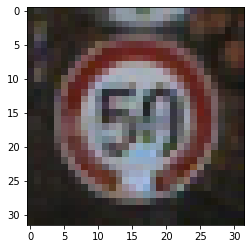

In [62]:
image=train_generator.next()[0][2]
plt.imshow(image)

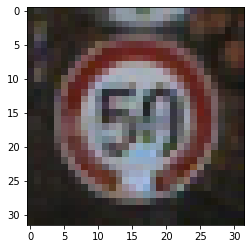

In [63]:
image *= 255
image = image.astype(np.uint8)
plt.imshow(image)

In [64]:
def visualize(image):
    plt.figure(figsize=(4,4))
    plt.axis('off')
    plt.imshow(image)

In [65]:
all_aug=['CLAHE', 'Blur', 'Cutout','GaussNoise','HueSaturationValue','ChannelShuffle','GridDistortion','MedianBlur','Normalize','PadIfNeeded','RandomBrightness','RandomBrightnessContrast','RandomContrast','ToGray','ShiftScaleRotate','add_rain','add_snow','add_shadow','darken','random_brightness']

In [66]:
input_aug=[]
n=int(input('Number of Augmentations : '))
for n in range(0,n):
  input_aug.append(input('Enter type of augmentation : '))

Number of Augmentations : 1
Enter type of augmentation : CLAHE


In [67]:
transforms=[]

In [68]:
for i in input_aug:
  if i in all_aug:
    if i=='CLAHE':
      clip_limit=int(input('Enter the clip limit : '))
      tile_grid_x,tile_grid_y = int(input("Input tile grid size : ")),int(input("Input tile grid size : "))
      tile_grid_size = (tile_grid_x,tile_grid_y)
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.CLAHE(clip_limit=clip_limit, tile_grid_size=tile_grid_size, always_apply=False, p=prob))
    elif i=='Cutout':
      num_holes=int(input('Enter the number of holes : '))
      max_h_size,max_w_size=int(input('Enter the maximum height : ')), int(input('Enter the maximum width : '))
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.Cutout(num_holes=num_holes, max_h_size=max_h_size, max_w_size=max_w_size, always_apply=False, p=prob))
    elif i=='GaussNoise':
      var_limit_x,var_limit_y = int(input("Input var limit size : ")),int(input("Input val limit : "))
      var_limit = (var_limit_x,var_limit_y)
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append( A.GaussNoise (var_limit=var_limit,  always_apply=False, p=prob))
    elif i=='HueSaturationValue':
      hue_shift_limit=int(input('Enter hue shift limit : '))
      sat_shift_limit=int(input('Enter sat shift limit : '))
      val_shift_limit=int(input('Enter val shift limit : '))
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.HueSaturationValue (hue_shift_limit=hue_shift_limit, sat_shift_limit=sat_shift_limit, val_shift_limit=val_shift_limit, always_apply=False, p=prob))
    elif i=='Blur':
      blur_limit=int(input('Enter the blur limit : '))
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.Blur (blur_limit=blur_limit, always_apply=False, p=prob)) 
    elif i=='ChannelShuffle':
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.ChannelShuffle(p=prob))
    elif i=='GridDistortion':
      num_steps=int(input('Enter the number of steps : '))
      distort_limit=float(input('Enter the distort limit : '))
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.GridDistortion (num_steps=num_steps, distort_limit=distort_limit, interpolation=1, border_mode=4,always_apply=False, p=prob))
    elif i=='MedianBlur':
      blur_limit=int(input('Enter the blur limit : '))
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.MedianBlur (blur_limit=blur_limit, always_apply=False, p=prob))
    elif i=='Normalize':
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.Normalize (mean=(0.12, 0.13, 0.14), std=(0.668, 0.699, 0.7), max_pixel_value=70, always_apply=False, p=prob))
    elif i=='PadIfNeeded':
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.PadIfNeeded (min_height=32, min_width=32,border_mode=4, value=None,  always_apply=False, p=prob))
    elif i=='RandomBrightness':
      limit=float(input('Enter the limit for brightness'))
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.RandomBrightness (limit=limit, always_apply=False, p=prob))
    elif i=='RandomBrightnessContrast':
      brightness_limit=float(input('Enter the limit for brightness'))
      contrast_limit=float(input('Enter the limit for contrast'))
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.RandomBrightnessContrast (brightness_limit=brightness_limit, contrast_limit=contrast_limit, always_apply=False, p=prob))
    elif i=='RandomContrast':
      limit=float(input('Enter the limit for contrast'))
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.RandomContrast (limit=limit, always_apply=False, p=prob))
    elif i=='ToGray':
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.ToGray(p=prob))
    elif i=='ShiftScaleRotate':
      shift_limit=float(input('Enter the shift limit'))
      rotate_limit=int(input('Enter the rotation limit'))
      prob=float(input('Enter the probability with which it is to be applied : '))
      transforms.append(A.ShiftScaleRotate (shift_limit=shift_limit, scale_limit=0.1, rotate_limit=rotate_limit, interpolation=1, border_mode=4, always_apply=False, p=prob))
    elif i=='add_rain':
      rain_type=input('Enter the type of rain (heavy/drizzle) : ')
      image= am.add_rain(image, rain_type=rain_type, slant=-1,drop_length=1,drop_width=1)
    elif i=='add_snow':
      snow_coeff=float(input('Enter the snow coefficient : '))
      image= am.add_snow(image, snow_coeff=snow_coeff) 
    elif i=='add_shadow':
      no_of_shadows=int(input('Enter the number of shadows : '))
      shadow_dimension=int(input('Enter the dimension of the shadow'))
      image= am.add_shadow(image, no_of_shadows=no_of_shadows, shadow_dimension=shadow_dimension) 
    elif i=='darken':
      darkness_coeff=float(input('Enter the darkness coefficient : '))
      image= am.darken(image, darkness_coeff=darkness_coeff)

Enter the clip limit : 8
Input tile grid size : 10
Input tile grid size : 10
Enter the probability with which it is to be applied : 0.25


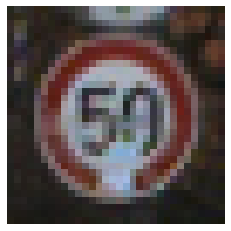

In [69]:
transform=A.Compose(transforms)
transformed = transform(image=image)
transformed_image = transformed["image"]
visualize(transformed_image)